## K-means Clustering in Python

**Objective:**
1. To understand and implement K-means clustering in Python using the scikit-learn library.
2. To analyze and interpret the clustering results.
3. To explore evaluation techniques for unsupervised learning.

In [16]:
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

### Part 1: K-means on Synthetic Data

**Step 1: Generate Synthetic Data**

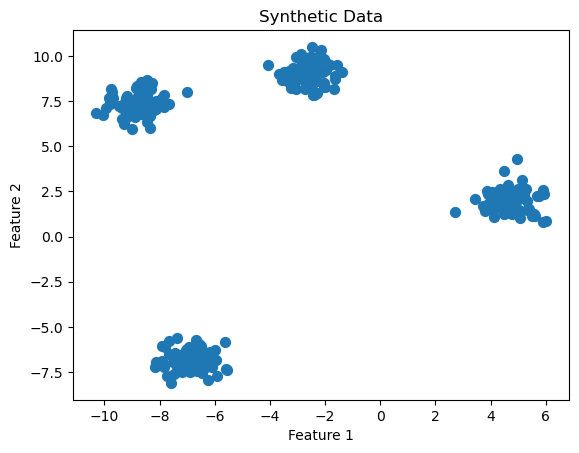

In [18]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate synthetic data
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

# Visualize the data
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Synthetic Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

**Step 2: Apply K-means Clustering**

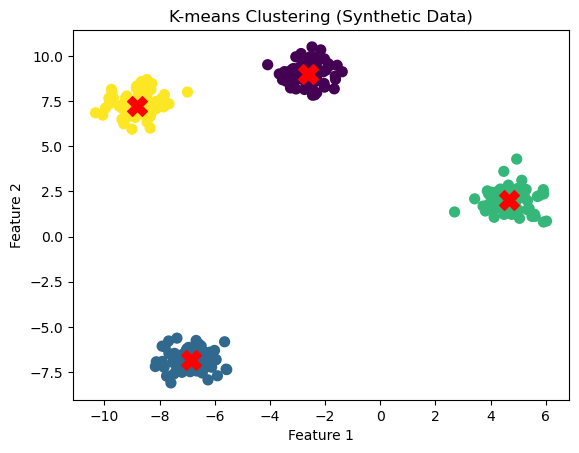

In [20]:
from sklearn.cluster import KMeans

# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

# Extract cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Visualize clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X')
plt.title("K-means Clustering (Synthetic Data)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

### Part 2: K-means on Real-world Dataset

**Step 1: Load the Iris Dataset**

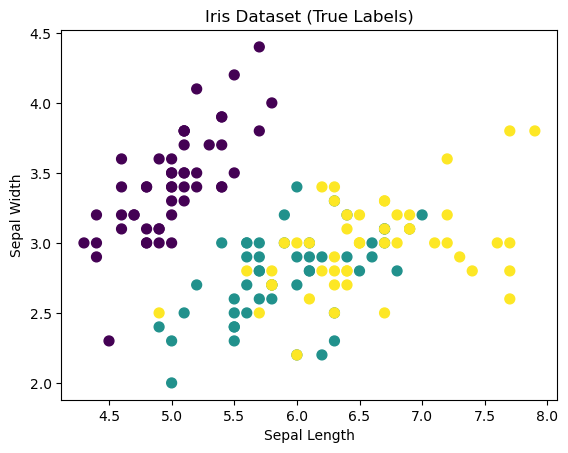

In [22]:
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()
X_iris = iris.data[:, :2]  # Use only the first two features
y_iris = iris.target       # True labels

# Visualize the data
plt.scatter(X_iris[:, 0], X_iris[:, 1], s=50, c=y_iris, cmap='viridis')
plt.title("Iris Dataset (True Labels)")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()

**Step 2: Apply K-means Clustering**

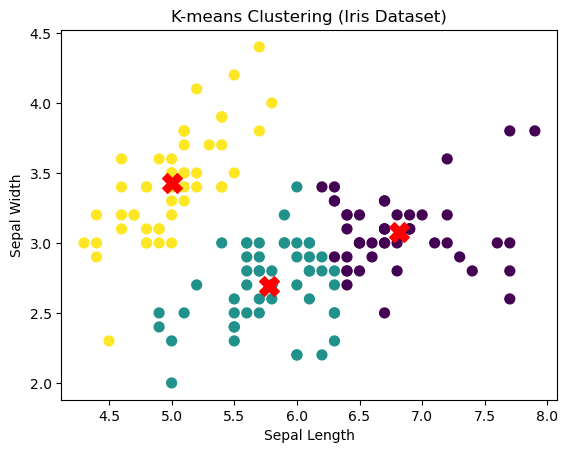

In [24]:
# Apply K-means clustering
kmeans_iris = KMeans(n_clusters=3, random_state=42)
kmeans_iris.fit(X_iris)

# Extract cluster labels and centroids
labels_iris = kmeans_iris.labels_
centroids_iris = kmeans_iris.cluster_centers_

# Visualize clusters
plt.scatter(X_iris[:, 0], X_iris[:, 1], c=labels_iris, cmap='viridis', s=50)
plt.scatter(centroids_iris[:, 0], centroids_iris[:, 1], c='red', s=200, marker='X')
plt.title("K-means Clustering (Iris Dataset)")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()

### Part 3: Hyperparameter Tuning and Elbow Method

**Calculate WCSS**

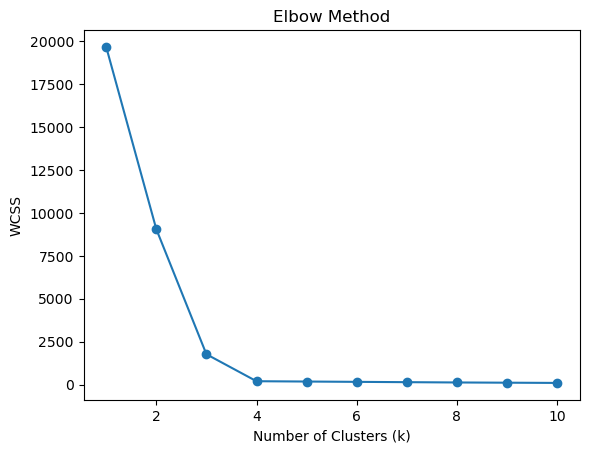

In [26]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.show()

### Part 4: Evaluation of Clustering

**Calculate Silhouette Score**

In [28]:
from sklearn.metrics import silhouette_score

# Silhouette score for synthetic data
silhouette_synthetic = silhouette_score(X, labels)
print(f"Silhouette Score (Synthetic Data): {silhouette_synthetic:.2f}")

# Silhouette score for Iris data
silhouette_iris = silhouette_score(X_iris, labels_iris)
print(f"Silhouette Score (Iris Data): {silhouette_iris:.2f}")

Silhouette Score (Synthetic Data): 0.88
Silhouette Score (Iris Data): 0.45
